In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [5]:
# Upload do arquivo
from google.colab import files
arq = files.upload()

In [6]:
df = pd.read_excel('/content/dataset/AdventureWorks.xlsx')

In [7]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [8]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
# Receita total
df['Valor Venda'].sum()

5984606.1426

In [21]:
# Custo total
df['Custo'] = df['Custo Unitário'] * df['Quantidade']

In [22]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [26]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [27]:
round(df['Custo'].sum(), 2)

2486783.05

In [28]:
# Lucro - Receita - Custo
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [29]:
df.sample(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
113,2009-04-10,2009-04-15,199,1155,18931,200904104CS840,324.69,980.00,6,0.000,5880.000,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,3931.860
546,2008-12-07,2008-12-11,306,1203,19060,200812074CS676,324.69,980.00,4,784.000,3136.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1298.76,1837.240
650,2009-03-20,2009-04-01,307,1178,19118,200903204CS708,330.66,998.00,5,998.000,3992.000,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1653.30,2338.700
553,2008-01-06,2008-01-16,306,1202,19046,200801064CS525,330.66,998.00,4,798.400,3193.600,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1322.64,1870.960
191,2009-05-24,2009-06-03,199,366,18946,200905243CS856,348.58,758.00,12,0.000,9096.000,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,4182.96,4913.040
120,2009-06-21,2009-07-02,199,1155,18957,200906214CS868,324.69,980.00,6,0.000,5880.000,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,3931.860
256,2008-07-06,2008-07-14,306,2496,19054,200807065CS588,5.09,9.99,240,0.000,2397.600,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,1221.60,1176.000
762,2008-12-03,2008-12-10,199,2497,18893,200812035CS800,5.09,9.99,156,311.688,1246.752,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,794.04,452.712
769,2009-08-31,2009-09-10,199,2497,18986,200908315CS899,5.09,9.99,288,287.712,2589.408,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,1465.92,1123.488
608,2008-09-04,2008-09-16,199,366,18868,200809043CS688,348.58,758.00,8,606.400,5457.600,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,2788.64,2668.960


In [30]:
# Total lucro
round(df['Lucro'].sum(), 2)

3497823.09

In [31]:
# Tempo de envio dos produtos
df['Tempo_envio'] = df['Data Envio'] - df['Data Venda'] 

In [32]:
df.sample(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
214,2009-07-09,2009-07-13,306,366,19070,200907093CS757,348.58,758.0,18,0.0,13644.0,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,6274.44,7369.56,4 days
328,2009-01-14,2009-01-21,307,384,19113,200901143CS680,348.58,758.0,7,795.9,4510.1,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2440.06,2070.04,7 days
101,2008-06-16,2008-06-23,306,1155,19053,200806164CS586,324.69,980.0,6,0.0,5880.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,3931.86,7 days
339,2008-12-16,2008-12-27,199,1203,18897,200812164CS805,324.69,980.0,32,6272.0,25088.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,10390.08,14697.92,11 days
493,2008-07-22,2008-08-01,199,1226,18856,200807224CS645,330.99,999.0,28,2797.2,25174.8,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,9267.72,15907.08,10 days
541,2009-11-06,2009-11-16,306,384,19076,200911063CS767,348.58,758.0,4,606.4,2425.6,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,1394.32,1031.28,10 days
175,2009-10-13,2009-10-24,307,1203,19137,200910134CS727,324.69,980.0,12,0.0,11760.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,3896.28,7863.72,11 days
411,2008-09-13,2008-09-24,306,1178,19057,200809134CS636,330.66,998.0,11,1097.8,9880.2,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,3637.26,6242.94,11 days
461,2008-09-21,2008-10-02,306,1226,19057,200809214CS636,330.99,999.0,11,1098.9,9890.1,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3640.89,6249.21,11 days
639,2009-03-15,2009-03-27,307,1155,19118,200903154CS708,324.69,980.0,5,980.0,3920.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1623.45,2296.55,12 days


In [33]:
# Tempo médio de envio para cada marca
# Transformar a coluna Tempo_envio em numérica

df['Tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [34]:
df.sample(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
245,2009-07-23,2009-07-27,307,1203,19130,200907234CS720,324.69,980.00,7,0.000,6860.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,2272.83,4587.170,4
680,2009-03-03,2009-03-07,199,384,18920,200903033CS828,348.58,758.00,5,189.500,3600.500,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,1742.90,1857.600,4
779,2008-05-28,2008-06-10,307,2497,19099,200805285CS568,5.09,9.99,144,143.856,1294.704,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,732.96,561.744,13
37,2009-06-03,2009-06-15,306,1178,19068,200906034CS748,330.66,998.00,6,0.000,5988.000,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96,4004.040,12
834,2008-02-18,2008-02-26,307,1202,19094,200802184CS549,330.66,998.00,6,1197.600,4790.400,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1983.96,2806.440,8
204,2008-05-15,2008-05-21,306,1155,19052,200805154CS576,324.69,980.00,12,0.000,11760.000,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3896.28,7863.720,6
310,2009-03-24,2009-04-06,307,384,19119,200903243CS709,348.58,758.00,15,2274.000,9096.000,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,5228.70,3867.300,13
74,2008-10-22,2008-10-26,199,1203,18880,200810224CS785,324.69,980.00,6,0.000,5880.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14,3931.860,4
707,2009-01-06,2009-01-11,306,2496,19061,200901065CS736,5.09,9.99,192,383.616,1534.464,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,977.28,557.184,5
208,2008-06-27,2008-07-10,199,1226,18849,200806274CS625,330.99,999.00,18,0.000,17982.000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,5957.82,12024.180,13


In [35]:
df['Tempo_envio'].dtype

dtype('int64')

In [36]:
# Tempo médio de envio para cada marca
df.groupby('Marca')['Tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [37]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

In [42]:
# Lucro por Ano e por Marca
df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum()

ValueError: ignored

In [44]:
# Mudando a formatação dos números
pd.options.display.float_format = "{:20,.2f}".format

In [45]:
# Lucro por Ano e por Marca
df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [47]:
# Passando o resultado do groupby como dataframe
# Resetando o index

df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum().reset_index()

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [48]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

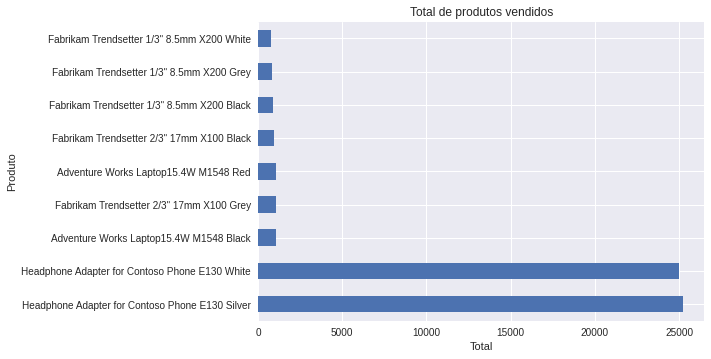

In [52]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).plot.barh(title="Total de produtos vendidos");
plt.xlabel('Total');
plt.ylabel('Produto');

Text(0, 0.5, 'Receita')

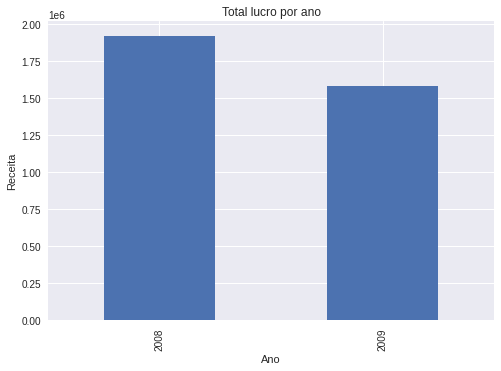

In [56]:
# Lucro por Ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().sort_values(ascending=False).plot.bar(title="Total lucro por ano");
plt.xlabel('Ano');
plt.ylabel('Receita')

In [55]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [57]:
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [58]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


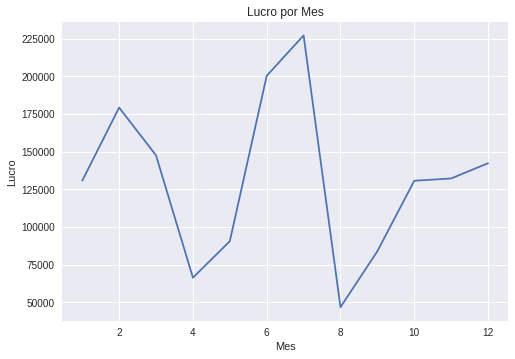

In [64]:
# Lucro por mês do ano de 2019
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title="Lucro por Mes");
plt.xlabel('Mes');
plt.ylabel('Lucro');

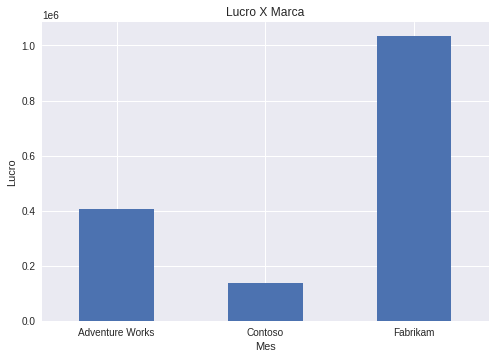

In [67]:
# Lucro por mês do ano de 2019 de cada marca
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title="Lucro X Marca");
plt.xlabel('Mes');
plt.ylabel('Lucro');
plt.xticks(rotation="horizontal");

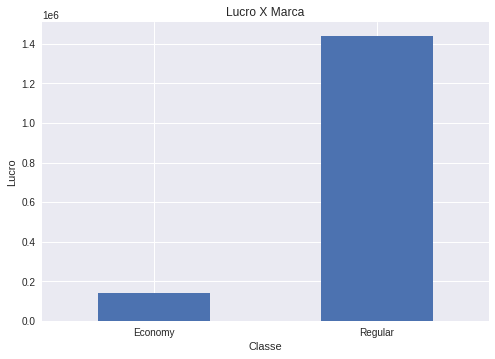

In [68]:
# Lucro por mês do ano de 2019 de cada classe
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title="Lucro X Marca");
plt.xlabel('Classe');
plt.ylabel('Lucro');
plt.xticks(rotation="horizontal");

In [69]:
df['Tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

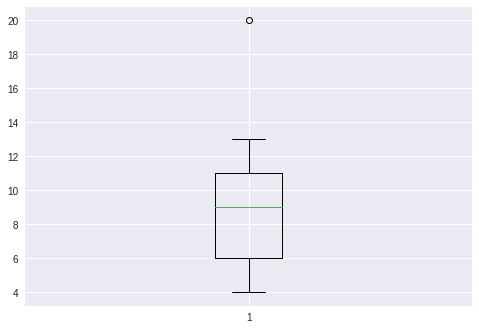

In [71]:
# Gráfico de Boxplot
plt.boxplot(df['Tempo_envio']);

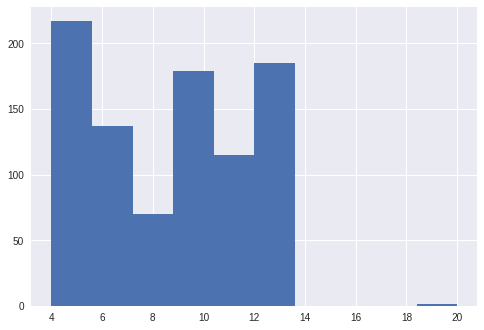

In [75]:
# Gráfico de Boxplot
plt.hist(df['Tempo_envio']);

In [72]:
df['Tempo_envio'].min()

4

In [73]:
df['Tempo_envio'].max()

20

In [74]:
df[df['Tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [76]:
df.to_csv('df_vendas_novo.csv', index=False)